<a href="https://colab.research.google.com/github/Nagi-131/ICP-5/blob/main/700761149%20ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoder without hidden layer


In [5]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

encoding_dim = 64

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6953 - val_loss: 0.6951
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6950 - val_loss: 0.6948
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6947 - val_loss: 0.6945
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6941 - val_loss: 0.6939
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6938 - val_loss: 0.6936
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6935 - val_loss: 0.6933
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6932 - val_loss: 0.6930
Epoch 9/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6929 - val_loss: 0.6927
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


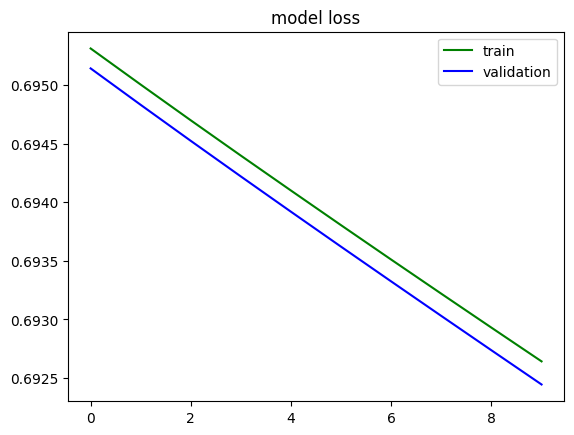

In [6]:
# graph
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Autoencoder with hidden layer

In [7]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 4s 15ms/step - loss: 0.2323 - val_loss: 0.1497
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1333 - val_loss: 0.1199
Epoch 3/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1157 - val_loss: 0.1093
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1077 - val_loss: 0.1036
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1032 - val_loss: 0.1003
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1001 - val_loss: 0.0975
Epoch 7/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0980 - val_loss: 0.0959
Epoch 8/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0966 - val_loss: 0.0951
Epoch 9/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0953 - val_loss: 0.0937
Epoch 10/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0940 - val_lo

313/313 [==============================] - 1s 4ms/step


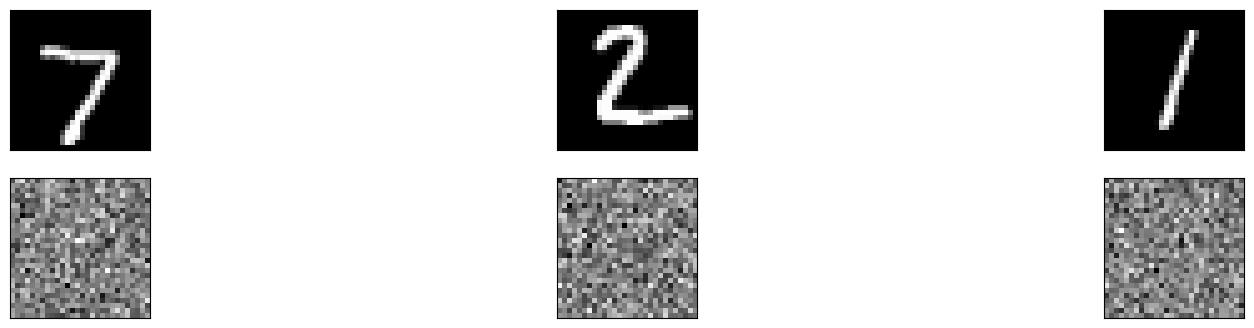

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 3
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

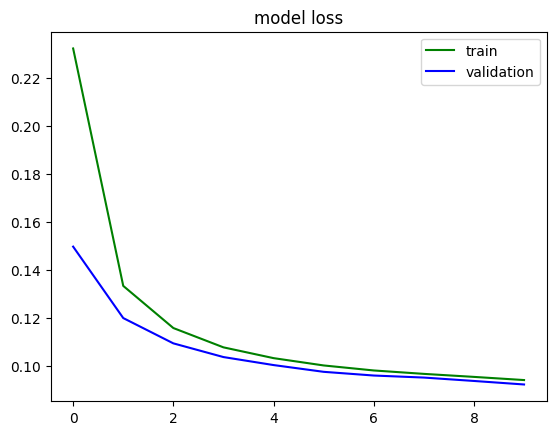

In [9]:
# graph
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib
3. Use denoisening autoencoder, to reconstruct the input,
4. Plot loss and accuracy using the history object.

In [10]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value
x_train.shape, x_test.shape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)
input_dim = x_train.shape[1]
encoding_dim = 64

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))
num_images = 5
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)
noise = np.random.normal(loc=0.1, scale=0.1, size=x_test.shape)
noised_images = x_test + noise
encoded_imgs = encoder.predict(noised_images)
decoded_imgs = autoencoder.predict(noised_images)

Compression factor: 12.25
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 784)               50960     
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                      